# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

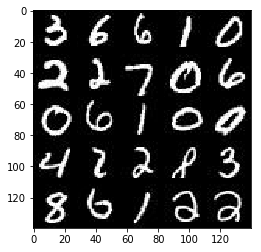

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

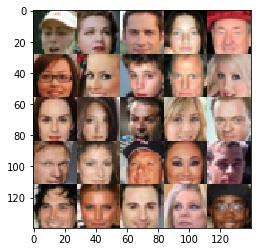

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/home/hojune/.conda/envs/udacity/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.5.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    img = tf.placeholder(dtype=tf.float32, shape=(None, image_width, image_height, image_channels))
    z = tf.placeholder(dtype=tf.float32, shape=(None, z_dim))
    lr = tf.placeholder(dtype=tf.float32, shape=(None))
    # TODO: Implement Function

    return img, z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function   
    with tf.variable_scope('discriminator', reuse=reuse):
        c1 = tf.layers.conv2d(images, 64, 5, 2, padding='same')
        c1 = tf.nn.leaky_relu(c1) #16x16x64
        
        c2 = tf.layers.conv2d(c1, 128, 5, 2, padding='same')
        c2 = tf.layers.batch_normalization(c2, training=True)
        c2 = tf.nn.leaky_relu(c2) #8x8x128
        
        c3 = tf.layers.conv2d(c2, 256, 5, 2, padding='same')
        c3 = tf.layers.batch_normalization(c3, training=True)
        c3 = tf.nn.leaky_relu(c3) #4x4x256
        
        d1 = tf.reshape(c3, (-1, 4*4*256))
        d1 = tf.layers.dense(d1, 1)
        y = tf.sigmoid(d1)
    
    return y, d1
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        d1 = tf.layers.dense(z, 7*7*512)
        d1 = tf.reshape(d1, (-1, 7, 7, 512))
        d1 = tf.layers.batch_normalization(d1, training=is_train)
        d1 = tf.nn.leaky_relu(d1)
        
        c1 = tf.layers.conv2d_transpose(d1, 256, 5, strides=1, padding='same')
        c1 = tf.layers.batch_normalization(c1, training=is_train)
        c1 = tf.nn.leaky_relu(c1)
        
        c2 = tf.layers.conv2d_transpose(c1, 128,  5, strides=2, padding='same')
        c2 = tf.layers.batch_normalization(c2, training=is_train)
        c2 = tf.nn.leaky_relu(c2)
        
        c3 = tf.layers.conv2d_transpose(c2, out_channel_dim, 5, strides=2, padding='same')

        y = tf.sigmoid(c3)
        return y


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [13]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    G = generator(input_z, out_channel_dim, is_train=True)
    D_out_real, D_real = discriminator(input_real, reuse=False)
    D_out_fake, D_fake = discriminator(G, reuse=True)
    D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=(tf.ones_like(D_out_real)*0.9), logits=D_real))
    D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(D_out_fake), logits=D_fake))
    D_loss = D_loss_real + D_loss_fake
    G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(D_fake), logits=D_fake))
    return D_loss, G_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [14]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    var = tf.trainable_variables()
    G_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='generator')
    D_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='discriminator')
    G_trn = tf.train.AdamOptimizer().minimize(g_loss, var_list=G_var)
    D_trn = tf.train.AdamOptimizer().minimize(d_loss, var_list=D_var)
    return D_trn, G_trn


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #data shape (None, W, H, C)
    img, z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    if data_image_mode == "L":
        C = 1
    else:
        C = 3
    D_loss, G_loss = model_loss(img, z, C)
    D_optim, G_optim = model_opt(D_loss, G_loss, lr, beta1)
    
    z_test = np.random.uniform(0, 1, size=(batch_size, z_dim))
    with tf.Session() as sess:
        saver = tf.train.Saver()
        steps = 0
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                zVec = np.random.uniform(0, 1, size=(batch_size, z_dim))
                _ = sess.run(D_optim, feed_dict={img: batch_images, z: zVec, lr: learning_rate})
                _ = sess.run(G_optim, feed_dict={img: batch_images, z: zVec, lr: learning_rate})
                _ = sess.run(G_optim, feed_dict={img: batch_images, z: zVec, lr: learning_rate})
                
                if steps % 400 == 0:
                    loss_d_for_print = D_loss.eval({img: batch_images, z: zVec, lr: learning_rate})
                    loss_g_for_print = G_loss.eval({img: batch_images, z: zVec, lr: learning_rate})
                    print("Epoch {}    ".format(epoch_i),
                         "D_loss: {}    ".format(loss_d_for_print),
                         "G_loss: {}".format(loss_g_for_print))
                
                if steps % 400 == 0:
                    show_generator_output(sess, 16, z, C, data_image_mode)
            saver.save(sess, 'model.ckpt')

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0     D_loss: 2.6769919395446777     G_loss: 0.29516714811325073


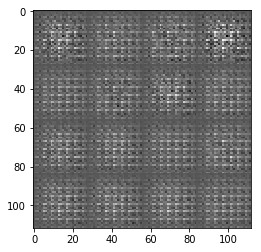

Epoch 0     D_loss: 1.2158126831054688     G_loss: 20.678112030029297


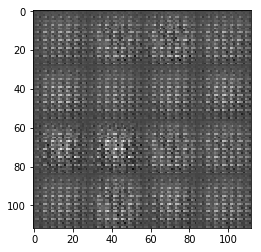

Epoch 0     D_loss: 0.8890929222106934     G_loss: 22.951034545898438


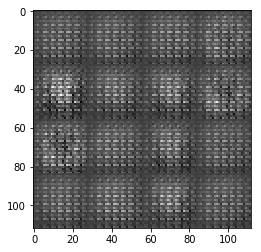

Epoch 0     D_loss: 1.5919244289398193     G_loss: 21.818355560302734


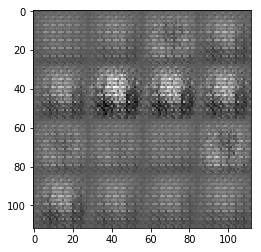

Epoch 0     D_loss: 0.850683867931366     G_loss: 19.590164184570312


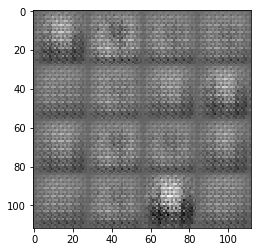

Epoch 0     D_loss: 0.8315228819847107     G_loss: 17.262420654296875


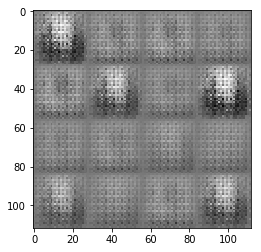

Epoch 0     D_loss: 0.8834402561187744     G_loss: 15.509350776672363


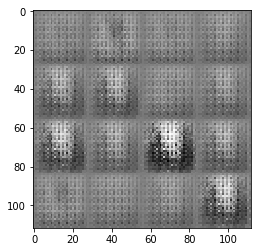

Epoch 0     D_loss: 0.754424512386322     G_loss: 14.197778701782227


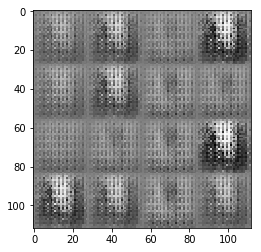

Epoch 0     D_loss: 0.6455411314964294     G_loss: 13.419099807739258


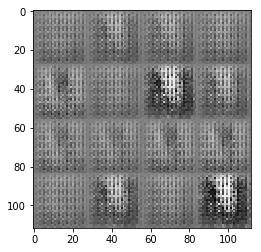

Epoch 0     D_loss: 0.4890904724597931     G_loss: 12.783985137939453


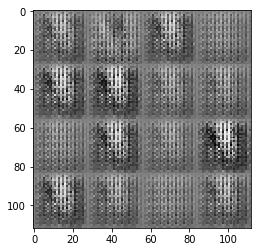

Epoch 0     D_loss: 0.8043308258056641     G_loss: 12.135690689086914


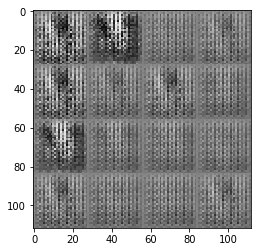

Epoch 0     D_loss: 0.4761984050273895     G_loss: 10.720516204833984


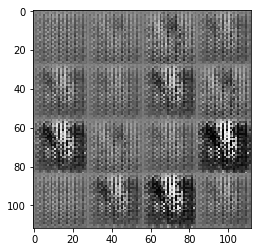

Epoch 0     D_loss: 0.48701581358909607     G_loss: 9.350719451904297


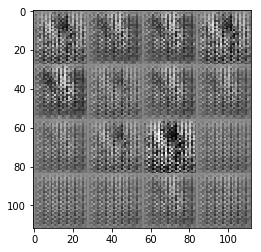

Epoch 0     D_loss: 0.5815613269805908     G_loss: 8.209299087524414


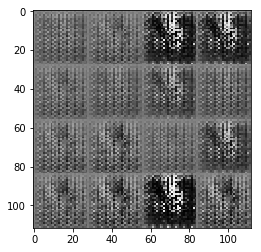

Epoch 0     D_loss: 0.591656506061554     G_loss: 7.339879989624023


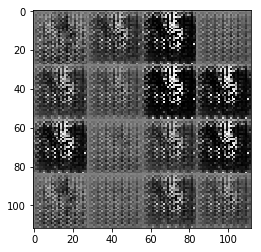

Epoch 0     D_loss: 0.5596827864646912     G_loss: 6.478484153747559


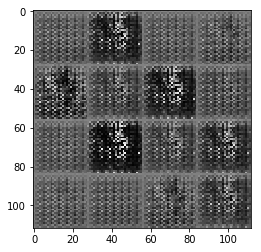

Epoch 0     D_loss: 0.4956813156604767     G_loss: 5.877775192260742


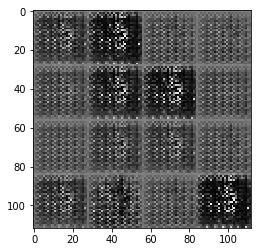

Epoch 0     D_loss: 0.37841102480888367     G_loss: 6.061499118804932


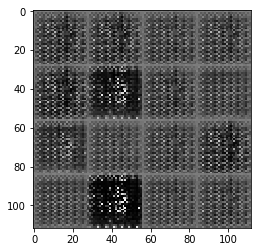

Epoch 0     D_loss: 0.40853357315063477     G_loss: 6.415306091308594


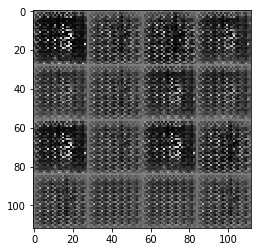

Epoch 0     D_loss: 0.5177461504936218     G_loss: 6.597319602966309


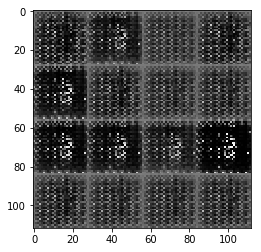

Epoch 0     D_loss: 0.4731300473213196     G_loss: 6.327419281005859


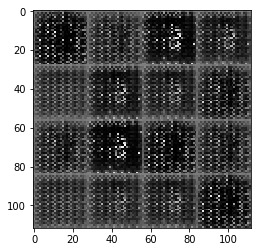

Epoch 0     D_loss: 0.3623960018157959     G_loss: 5.951014518737793


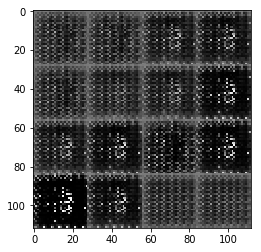

Epoch 0     D_loss: 0.3792656362056732     G_loss: 5.657413005828857


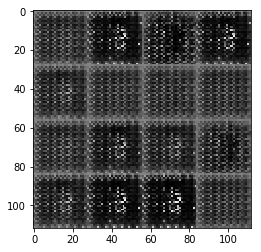

Epoch 0     D_loss: 0.3986179530620575     G_loss: 5.644067764282227


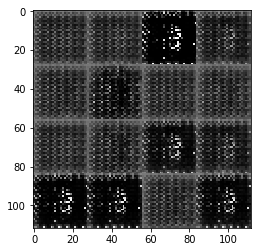

Epoch 0     D_loss: 0.40751323103904724     G_loss: 5.8146514892578125


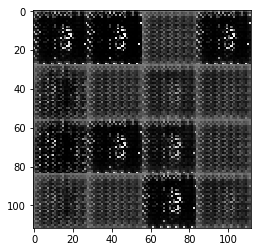

Epoch 0     D_loss: 0.3828290104866028     G_loss: 6.248441219329834


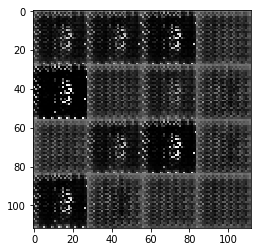

Epoch 0     D_loss: 0.35207638144493103     G_loss: 6.7859039306640625


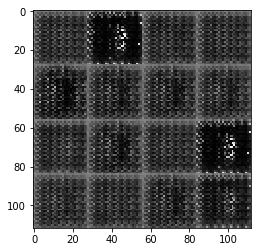

Epoch 0     D_loss: 0.3376038372516632     G_loss: 7.390011787414551


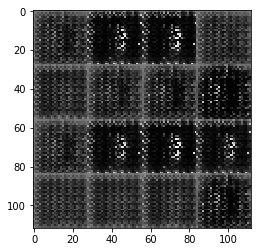

Epoch 0     D_loss: 0.358847439289093     G_loss: 7.843327522277832


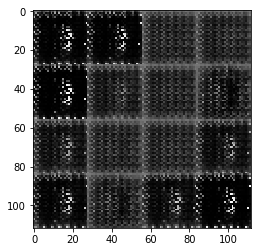

Epoch 0     D_loss: 0.38875213265419006     G_loss: 8.091131210327148


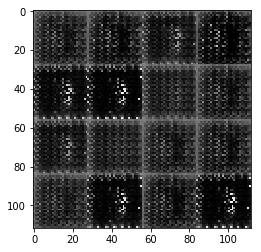

Epoch 0     D_loss: 0.35509052872657776     G_loss: 8.196343421936035


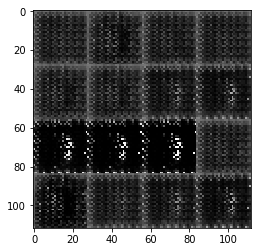

Epoch 0     D_loss: 0.33800458908081055     G_loss: 8.167926788330078


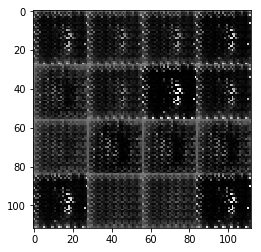

Epoch 0     D_loss: 0.3573557436466217     G_loss: 8.14737319946289


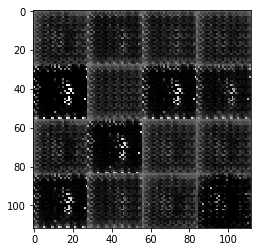

KeyboardInterrupt: 

In [15]:
batch_size = 128
z_dim = 128
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
batch_size = 128
z_dim = 128
learning_rate = 1e-3
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.